In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

In [2]:
import pandas as pd
predic = pd.read_csv("dataset-prueba2.csv")
predic

,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
5,-12.0,-5.0,-1.0,4.0,-16.0,-17.0,-69.0,-16.0,-12.0,-3.0,...,1.0,-36.0,-10.0,-12.0,-16.0,-12.0,-47.0,6.0,-30.0,0
6,43.0,0.0,-2.0,6.0,11.0,26.0,51.0,27.0,-9.0,-2.0,...,41.0,15.0,4.0,10.0,25.0,9.0,13.0,73.0,47.0,0
7,-26.0,-9.0,-18.0,-60.0,-23.0,-35.0,-85.0,-40.0,27.0,10.0,...,-17.0,-7.0,-1.0,2.0,10.0,-6.0,7.0,-2.0,-1.0,0
8,-34.0,3.0,9.0,29.0,6.0,-25.0,-124.0,-1.0,12.0,-6.0,...,-6.0,41.0,0.0,-10.0,-17.0,21.0,3.0,42.0,11.0,0
9,-1.0,0.0,6.0,37.0,21.0,22.0,-15.0,-36.0,-10.0,-3.0,...,-73.0,33.0,14.0,11.0,7.0,26.0,60.0,127.0,105.0,0


/home/turrin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


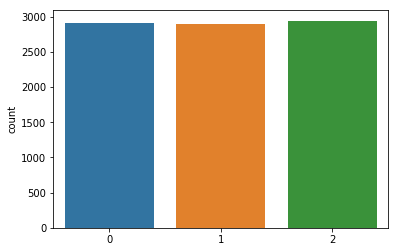

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=predic.ix[:,64].values, data=predic)
plt.show()

/home/turrin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


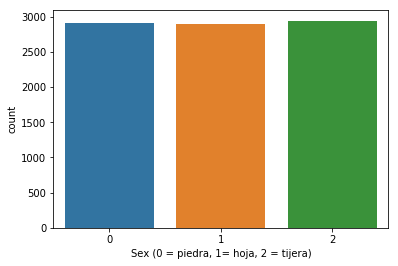

In [11]:
sns.countplot(x=predic.ix[:,64].values, data=predic)
plt.xlabel("Sex (0 = piedra, 1= hoja, 2 = tijera)")
plt.show()

In [14]:
predic.groupby(x=predic.ix[:,64].values).mean()

/home/turrin/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


TypeError: You have to supply one of 'by' and 'level'